In [181]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import os
import matplotlib.image as mpimg
from PIL import Image
from scipy import ndimage
import skimage
from skimage import transform

def load_data(directory):
    directories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    classes = []
    labels = []
    arrays = []
    
    for d in directories:
        classes.append('O' if int(d) == 1 else 'X')
        label_dir = os.path.join(directory, d)
        file_names = [os.path.join(label_dir, f) for f in os.listdir(label_dir)]
        for f in file_names:
            arrays.append(mpimg.imread(f))
            labels.append(int(d))
    nparray = np.array(arrays)
    size = nparray.shape
    nplabels = np.array(labels)
    nplabels = nplabels.reshape(1, nplabels.shape[0])
    npclasses = np.array(classes)
    return nparray, nplabels, npclasses



In [196]:
train_arrays, train_labels, train_classes = load_data("/Users/xiaomei/train")
test_arrays, test_labels, test_classes = load_data("/Users/xiaomei/test")
print(train_arrays.shape, train_labels.shape, train_classes)
print(test_arrays.shape, test_labels.shape, test_classes)

(200, 28, 28, 3) (1, 200) ['X' 'O']
(100, 28, 28, 3) (1, 100) ['X' 'O']


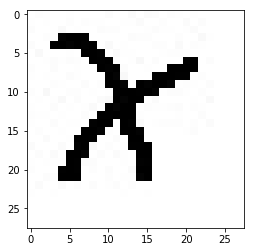

In [129]:
plt.imshow(train_arrays[0])

In [130]:
m_train = train_arrays.shape[0]
m_test = test_arrays.shape[0]
num_px = train_arrays.shape[1]
print("train set size = ", m_train)
print("test set size = ", m_test)
print("image height = ", num_px)

train set size =  200
test set size =  100
image height =  28


In [131]:
train_arrays_flatten = train_arrays.reshape(train_arrays.shape[0], -1).T
test_arrays_flatten = test_arrays.reshape(test_arrays.shape[0], -1).T

print("after flatten, train shape ", train_arrays_flatten.shape)
print("after flatten, test shape ", test_arrays_flatten.shape)

after flatten, train shape  (2352, 200)
after flatten, test shape  (2352, 100)


In [132]:
train_arrays = train_arrays_flatten / 255
test_arrays = test_arrays_flatten / 255

In [133]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [134]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [135]:
def init_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w, b

dim = 2
w, b = init_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

In [136]:
dim = 2 
w, b = init_with_zeros(dim) 
print("w = " + str(w)) 
print("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [145]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -(np.dot(Y, np.log(A.T)) + np.dot((1 - Y), np.log(1 - A.T))) / m
    
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    
    cost = np.squeeze(cost)
    
    grads = {"dw" : dw,
             "db" : db}
    
    return grads, cost

In [138]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

w shape =  (2, 1)
b =  2.0
X shape =  (2, 3)
Y shape =  (1, 3)
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [139]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i % 100 == 0:
            print("cost after iteration %i: %f" %(i, cost))
            
    params = {
        "w" : w,
        "b" : b
    }
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    return params, grads, costs

In [146]:
params, grads, costs = optimize(w, b, X, Y, num_iterations = 100, learning_rate = 0.009, print_cost = True)
print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

cost after iteration 0: 1.034581
w = [[-0.09074004]
 [-0.17575227]]
b = -0.08829977041766024
dw = [[0.0812713]
 [0.0848785]]
db = -0.25277735815918045


In [156]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    print("A size = ", A.shape)
    print("Y size = ", Y_prediction.shape)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 0 if A[0, i] <= 0.5 else 1
    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction

In [157]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
x = np.array([[1., -1.1, -3.2], [1.2, 2., 0.1]])
print("predictions = " + str(predict(w, b, x)))

A size =  (1, 3)
Y size =  (1, 3)
predictions = [[1. 1. 0.]]


In [158]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = init_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    print("train accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy : {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    d = {
        "costs" : costs,
        "Y_prediction_test" : Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" : w,
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations" : num_iterations
    }
    return d

In [159]:
d = model(train_arrays, train_labels, test_arrays, test_labels, num_iterations=2000, learning_rate=0.005, print_cost= True)

cost after iteration 0: 0.693147
cost after iteration 100: 0.210416
cost after iteration 200: 0.160629
cost after iteration 300: 0.135648
cost after iteration 400: 0.119197
cost after iteration 500: 0.107034
cost after iteration 600: 0.097464
cost after iteration 700: 0.089644
cost after iteration 800: 0.083094
cost after iteration 900: 0.077510
cost after iteration 1000: 0.072688
cost after iteration 1100: 0.068481
cost after iteration 1200: 0.064777
cost after iteration 1300: 0.061493
cost after iteration 1400: 0.058561
cost after iteration 1500: 0.055929
cost after iteration 1600: 0.053553
cost after iteration 1700: 0.051398
cost after iteration 1800: 0.049435
cost after iteration 1900: 0.047638
A size =  (1, 100)
Y size =  (1, 100)
A size =  (1, 200)
Y size =  (1, 200)
train accuracy : 99.5 %
test accuracy : 87.0 %


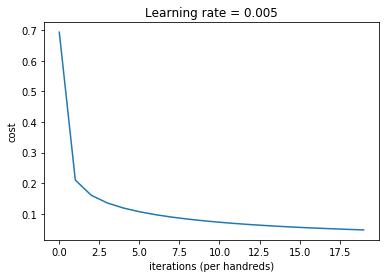

In [161]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per handreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

learning_rate is : 0.05


/Users/xiaomei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


A size =  (1, 100)
Y size =  (1, 100)
A size =  (1, 200)
Y size =  (1, 200)
train accuracy : 100.0 %
test accuracy : 88.0 %

 -------------------------------------------------------------- 

learning_rate is : 0.01
A size =  (1, 100)
Y size =  (1, 100)
A size =  (1, 200)
Y size =  (1, 200)
train accuracy : 99.5 %
test accuracy : 88.0 %

 -------------------------------------------------------------- 

learning_rate is : 0.001
A size =  (1, 100)
Y size =  (1, 100)
A size =  (1, 200)
Y size =  (1, 200)
train accuracy : 97.5 %
test accuracy : 89.0 %

 -------------------------------------------------------------- 

learning_rate is : 0.0001
A size =  (1, 100)
Y size =  (1, 100)
A size =  (1, 200)
Y size =  (1, 200)
train accuracy : 93.5 %
test accuracy : 89.0 %

 -------------------------------------------------------------- 



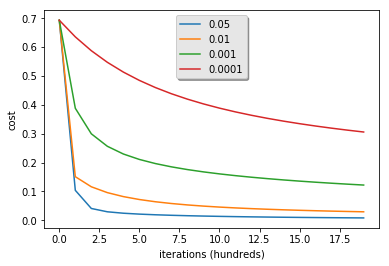

In [164]:
learning_rates = [0.05, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning_rate is :", i)
    models[str(i)] = model(train_arrays, train_labels, test_arrays, test_labels, num_iterations=2000, learning_rate= i, print_cost=False)
    print("\n -------------------------------------------------------------- \n")
    
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label = str(models[str(i)]["learning_rate"]))
    
plt.ylabel("cost")
plt.xlabel("iterations (hundreds)")

legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor("0.90")
plt.show()

In [184]:
def predictMyImage(my_image):
# my_image = "x-clipart-21.jpg"
    fname = "/Users/xiaomei/" + my_image
    image = np.array(mpimg.imread(fname))
    my_image = skimage.transform.resize(image, output_shape=(num_px, num_px)).reshape(1, -1).T
    my_predict_image = predict(d["w"], d["b"], my_image)

    plt.imshow(image)
    print(" y = " + str(np.squeeze(my_predict_image)) + ", your algorithm predicts a \"" + train_classes[int(np.squeeze(my_predict_image)),] + "\" picture.")

A size =  (1, 1)
Y size =  (1, 1)
 y = 0.0, your algorithm predicts a "X" picture.


/Users/xiaomei/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


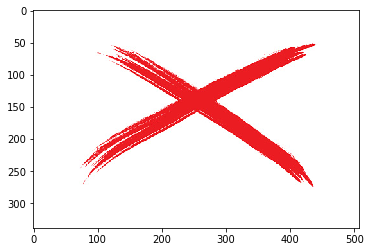

In [185]:
predictMyImage("x-clipart-21.jpg")

/Users/xiaomei/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


A size =  (1, 1)
Y size =  (1, 1)
 y = 1.0, your algorithm predicts a "O" picture.


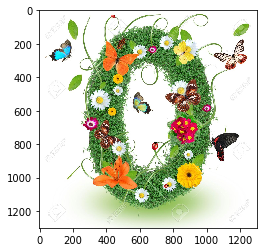

In [193]:
predictMyImage("spring-letter-o.jpg")

A size =  (1, 1)
Y size =  (1, 1)
 y = 0.0, your algorithm predicts a "X" picture.


/Users/xiaomei/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


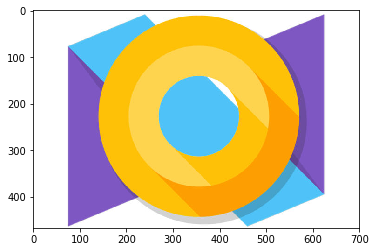

In [187]:
predictMyImage("android-o-large.jpg")

A size =  (1, 1)
Y size =  (1, 1)
 y = 1.0, your algorithm predicts a "O" picture.


/Users/xiaomei/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


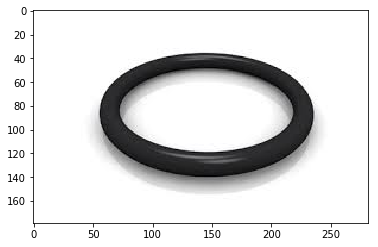

In [195]:
predictMyImage("ring.jpeg")